In [1]:
# INSTALLING THE MODULES

!pip install yfinance;
!pip install yahoo-fin;
!pip install sweetviz;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 65.9 MB/s eta 0:00:00


In [2]:
# CONNECTING YAHOO FINANCE AND INPORTING THE DATA

import numpy as np
from yahoo_fin.stock_info import get_data
shares=[]
companies=input("type the company name: ")
data_7=get_data(companies,start_date='01/01/2005',end_date=None,interval='1d')
  
print(np.shape(data_7))

type the company name: tsla
(3203, 7)


In [3]:
# DROPPING COLUMN TICKER IRRELEVENT

data_7=data_7.drop("ticker",axis=1)
data_7

,open,high,low,close,adjclose,volume
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900
2023-03-15,180.800003,182.339996,176.029999,180.449997,180.449997,145995600
2023-03-16,180.369995,185.809998,178.839996,184.130005,184.130005,121136800
2023-03-17,184.520004,186.220001,177.330002,180.130005,180.130005,132936600


In [4]:
# DATA OVERVIEW

print("data : ",data_7.head())
print("")
print("columns : ",data_7.columns)
print("")
print("basic description : ",data_7.describe())
print("")
print("basic information : ",data_7.info())
print("")
print("shape : ",data_7.shape)
print("_________________________________________________________________________________________________________________________________")

data :                  open      high       low     close  adjclose     volume
2010-06-29  1.266667  1.666667  1.169333  1.592667  1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667  1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000  1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000  1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000  1.074000  103003500

columns :  Index(['open', 'high', 'low', 'close', 'adjclose', 'volume'], dtype='object')

basic description :                open         high          low        close     adjclose  \
count  3203.000000  3203.000000  3203.000000  3203.000000  3203.000000   
mean     60.695959    62.075584    59.190636    60.665096    60.665096   
std      96.007002    98.232913    93.516125    95.900742    95.900742   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%       9.378000     9.608666     9.125667     9.310667     9.310667   
50% 

In [5]:
# DATA OVERVIEW

import sweetviz
my_report=sweetviz.analyze([data_7,'Train'])
my_report.show_html("Final_Report_"+".html")

                                             |          | [  0%]   00:00 -> (? left)

Report Final_Report_.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
# CHECKING FOR NULL VALUES

print(data_7.isnull().sum())
print("____________________________")

open        0
high        0
low         0
close       0
adjclose    0
volume      0
dtype: int64
____________________________


In [7]:
# REMOVING NULL VALUES

for i in data_7.columns:
  for j in data_7[data_7[i].isnull()].index.tolist():
    data_7.drop(j,axis=0,inplace=True)
  data_7=data_7.reset_index(drop=True)
print(data_7)

            open        high         low       close    adjclose     volume
0       1.266667    1.666667    1.169333    1.592667    1.592667  281494500
1       1.719333    2.028000    1.553333    1.588667    1.588667  257806500
2       1.666667    1.728000    1.351333    1.464000    1.464000  123282000
3       1.533333    1.540000    1.247333    1.280000    1.280000   77097000
4       1.333333    1.333333    1.055333    1.074000    1.074000  103003500
...          ...         ...         ...         ...         ...        ...
3198  177.309998  183.800003  177.139999  183.259995  183.259995  143717900
3199  180.800003  182.339996  176.029999  180.449997  180.449997  145995600
3200  180.369995  185.809998  178.839996  184.130005  184.130005  121136800
3201  184.520004  186.220001  177.330002  180.130005  180.130005  132936600
3202  178.080002  186.440002  176.350006  183.250000  183.250000  129507600

[3203 rows x 6 columns]


In [8]:
# FINAL CHECK FOR NULL VALUES

print(data_7.isnull().sum())
print("____________________________")

open        0
high        0
low         0
close       0
adjclose    0
volume      0
dtype: int64
____________________________


#DATA VISUALIZATION

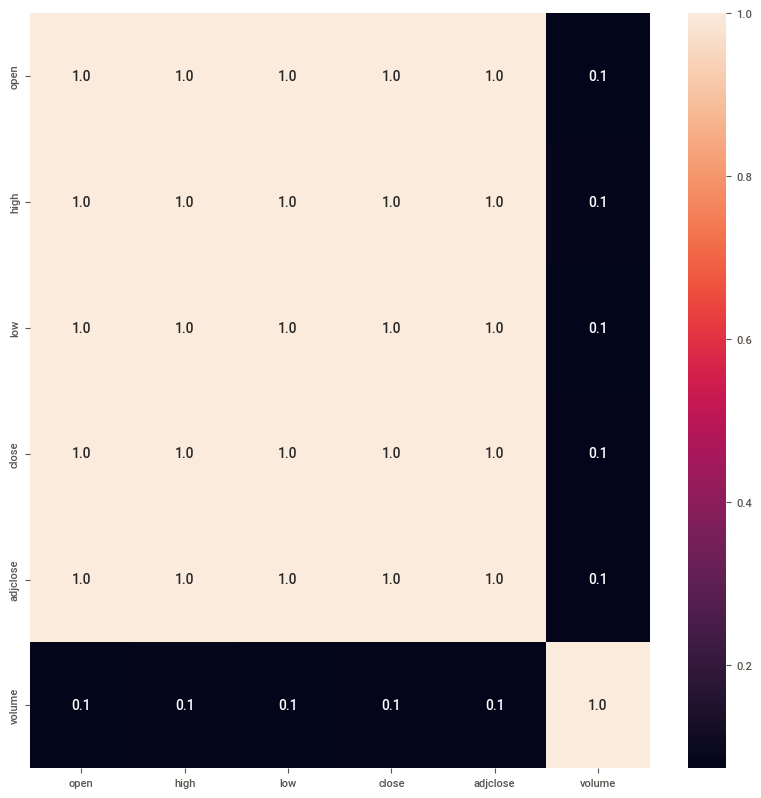

In [9]:
# CORRELATION HEATMAPS

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
sns.heatmap(data=data_7.corr(),annot=True, fmt=".1f")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


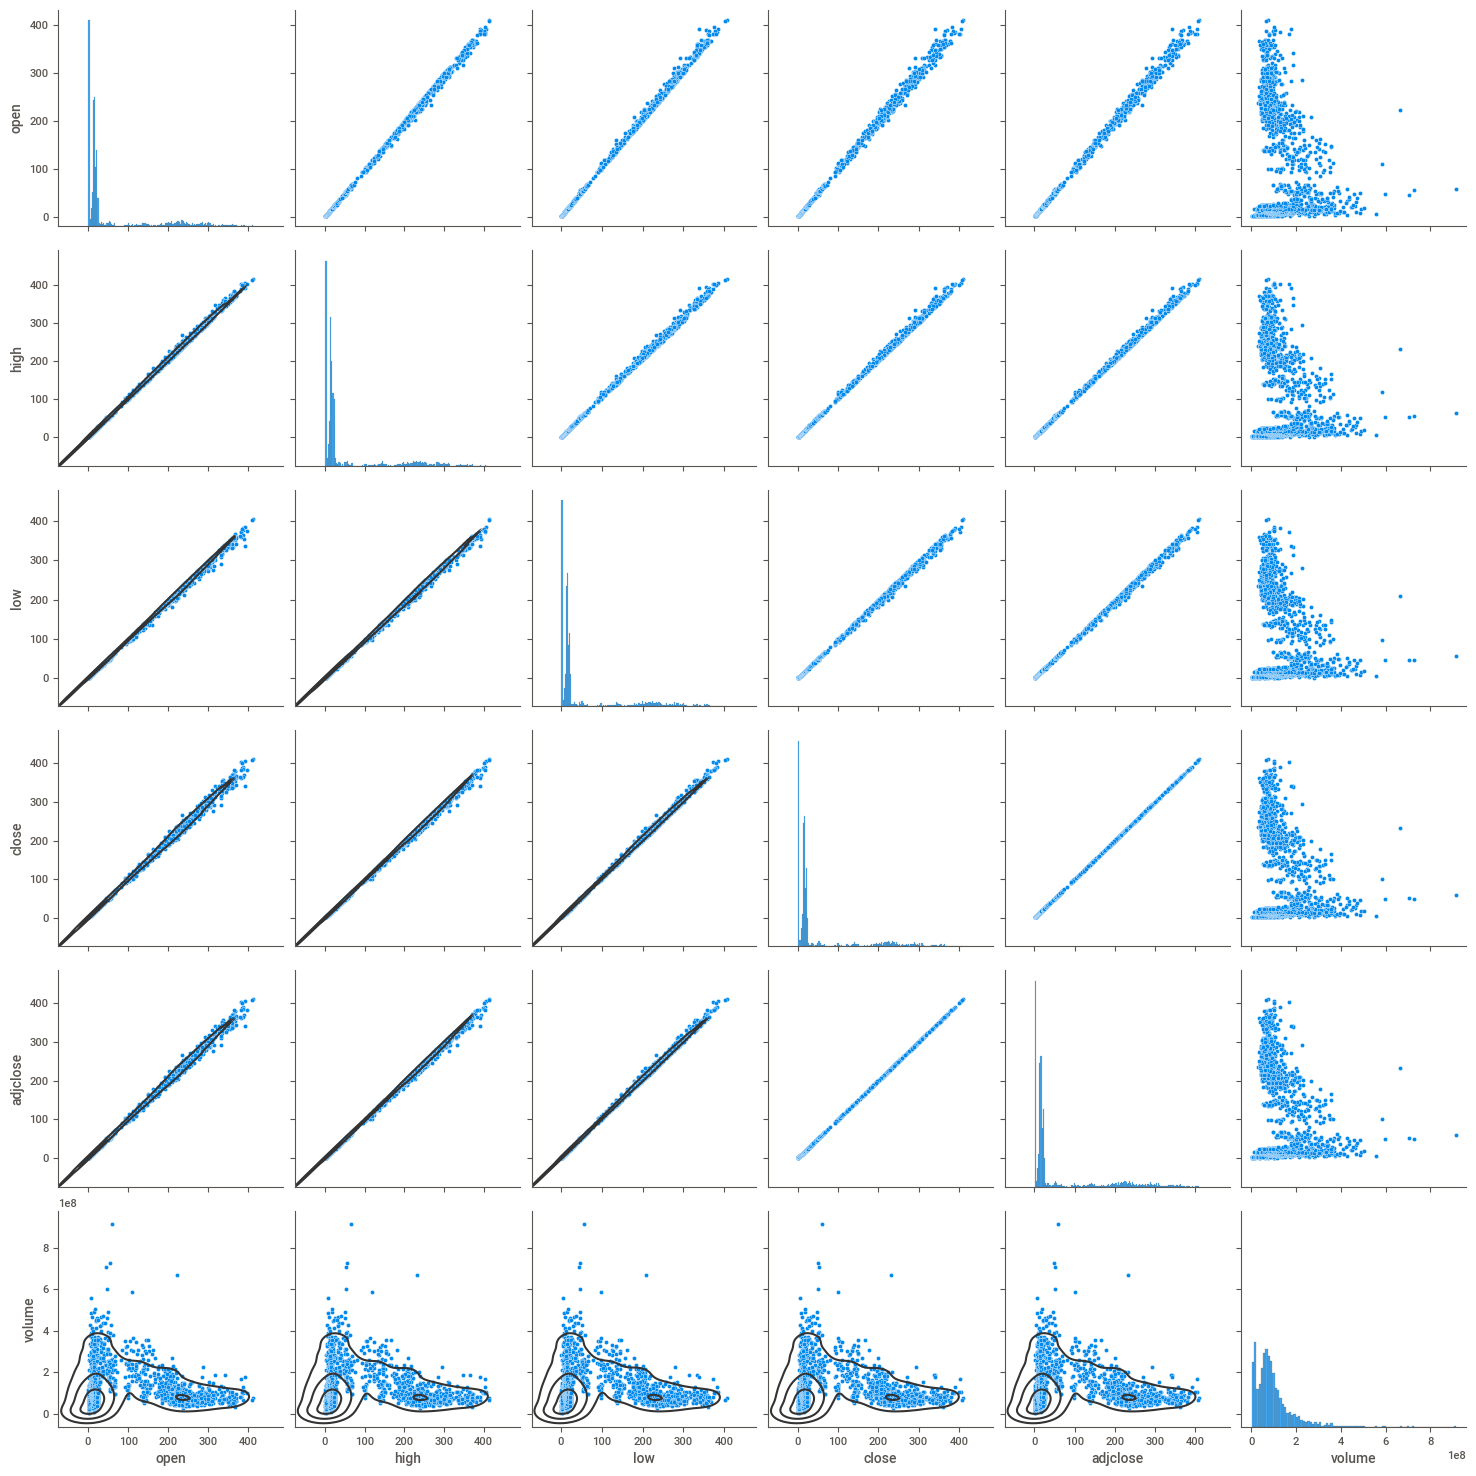

In [10]:
# KDE PLOT AND PAIRPLOTS

g=sns.pairplot(data_7)
g.map_lower(sns.kdeplot,levels=4,color=".2")
plt.show()

In [11]:
# SHARE VALUE REPRESENTATION OPEN AND CLOSE

import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_7.index,y=data_7['close'],name="close"))
fig.add_trace(go.Scatter(x=data_7.index,y=data_7['open'],name="open"))
fig.update_layout(title='REPRESENTATION OF OPEN AND CLOSE SHARES',xaxis_title="Date",yaxis_title="Value",legend_title="Legend",)
fig.show()

# SHARE VALUE REPRESENTATION HIGH AND LOW

fig=go.Figure()
fig.add_trace(go.Scatter(x=data_7.index,y=data_7['high'],name="high"))
fig.add_trace(go.Scatter(x=data_7.index,y=data_7['low'],name="low"))
fig.update_layout(title='REPRESENTATION OF HIGH AND LOW SHARES',xaxis_title="Date",yaxis_title="Value",legend_title="Legend",)
fig.show()

In [12]:
# 1 DAY DIFFERENCE FOR ADJ CLOSE FEATURE

zzz=data_7['adjclose']
www=[0]
for j in range(0,len(zzz)-1):
  yyy=zzz[j+1]-zzz[j]
  www.append(yyy)

fig=go.Figure()
fig.add_trace(go.Scatter(x=data_7.index,y=www,name="adj close"))
fig.update_layout(title='RESIDUAL ADJ CLOSE VALUE',xaxis_title="Date",yaxis_title="Value",legend_title="Legend",)
fig.show()

In [13]:
# SHARE REPRESENTATION FOR LAST 50 DAYS

from plotly.subplots import make_subplots
fig_i=make_subplots(specs=[[{"secondary_y": True}]])
fig_i.add_trace(go.Candlestick(x=data_7[-50:].index,open=data_7['open'][-50:],high=data_7['high'][-50:],low=data_7['low'][-50:],close=data_7['close'][-50:]))
fig_i.show()

#MODELLING

Epoch 1/10
2663/2663 [==============================] - 27s 7ms/step - loss: 503.9779
Epoch 2/10
2663/2663 [==============================] - 20s 7ms/step - loss: 109.6901
Epoch 3/10
2663/2663 [==============================] - 18s 7ms/step - loss: 80.2482
Epoch 4/10
2663/2663 [==============================] - 18s 7ms/step - loss: 75.8826
Epoch 5/10
2663/2663 [==============================] - 18s 7ms/step - loss: 54.6298
Epoch 6/10
2663/2663 [==============================] - 18s 7ms/step - loss: 58.5259
Epoch 7/10
2663/2663 [==============================] - 18s 7ms/step - loss: 64.7396
Epoch 8/10
2663/2663 [==============================] - 18s 7ms/step - loss: 68.5198
Epoch 9/10
2663/2663 [==============================] - 18s 7ms/step - loss: 55.8981
Epoch 10/10
15/15 [==============================] - 1s 4ms/step
test rmse :  58.83595897215332


<ipython-input-14-837b252c0c0c>:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



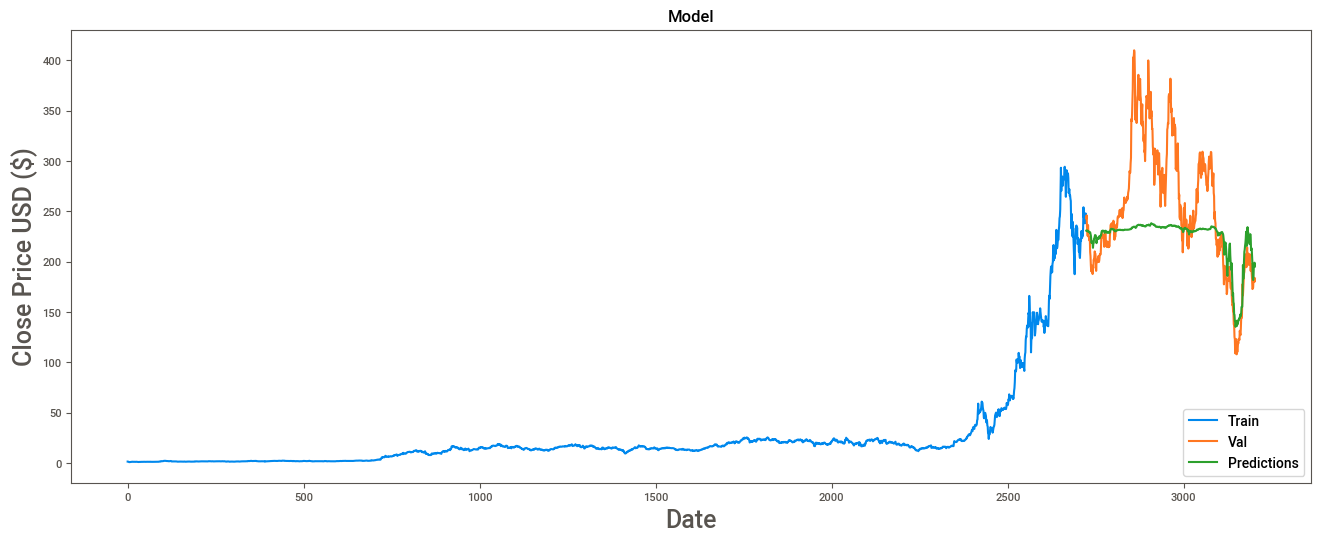

            open        high         low       close    adjclose     volume  \
2723  239.933334  245.786667  238.486664  243.133331  243.133331   85110000   
2724  247.000000  249.766663  244.203339  246.066666  246.066666   93115500   
2725  239.320007  241.333328  234.449997  234.913330  234.913330   88311000   
2726  232.136673  236.166672  231.199997  231.466660  231.466660   66813000   
2727  233.169998  234.083328  222.833328  225.666672  225.666672   86536200   
...          ...         ...         ...         ...         ...        ...   
3198  177.309998  183.800003  177.139999  183.259995  183.259995  143717900   
3199  180.800003  182.339996  176.029999  180.449997  180.449997  145995600   
3200  180.369995  185.809998  178.839996  184.130005  184.130005  121136800   
3201  184.520004  186.220001  177.330002  180.130005  180.130005  132936600   
3202  178.080002  186.440002  176.350006  183.250000  183.250000  129507600   

      Predictions  
2723   230.955002  
2724   231.

In [14]:
# MAKING A MODEL FOR CLOSE

data=data_7.filter(['close'])
dataset=data.values



training_data_len=int(np.ceil(len(dataset)*.85 ))
train_data=dataset[0:int(training_data_len), :]



x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train,batch_size=1,epochs=10)



test_data = dataset[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("test rmse : ",rmse)


import matplotlib.pyplot as plt
train=data_7[:training_data_len]
valid=data_7[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

print(valid)

Epoch 1/10
2663/2663 [==============================] - 22s 7ms/step - loss: 559.1099
Epoch 2/10
2663/2663 [==============================] - 18s 7ms/step - loss: 110.5908
Epoch 3/10
2663/2663 [==============================] - 17s 7ms/step - loss: 72.5935
Epoch 4/10
2663/2663 [==============================] - 18s 7ms/step - loss: 55.1918
Epoch 5/10
2663/2663 [==============================] - 18s 7ms/step - loss: 46.9537
Epoch 6/10
2663/2663 [==============================] - 17s 7ms/step - loss: 63.5465
Epoch 7/10
2663/2663 [==============================] - 18s 7ms/step - loss: 65.2901
Epoch 8/10
2663/2663 [==============================] - 18s 7ms/step - loss: 56.6974
Epoch 9/10
2663/2663 [==============================] - 18s 7ms/step - loss: 53.2075
Epoch 10/10
15/15 [==============================] - 1s 5ms/step
test rmse :  68.17203178517978


<ipython-input-15-265644c73c94>:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



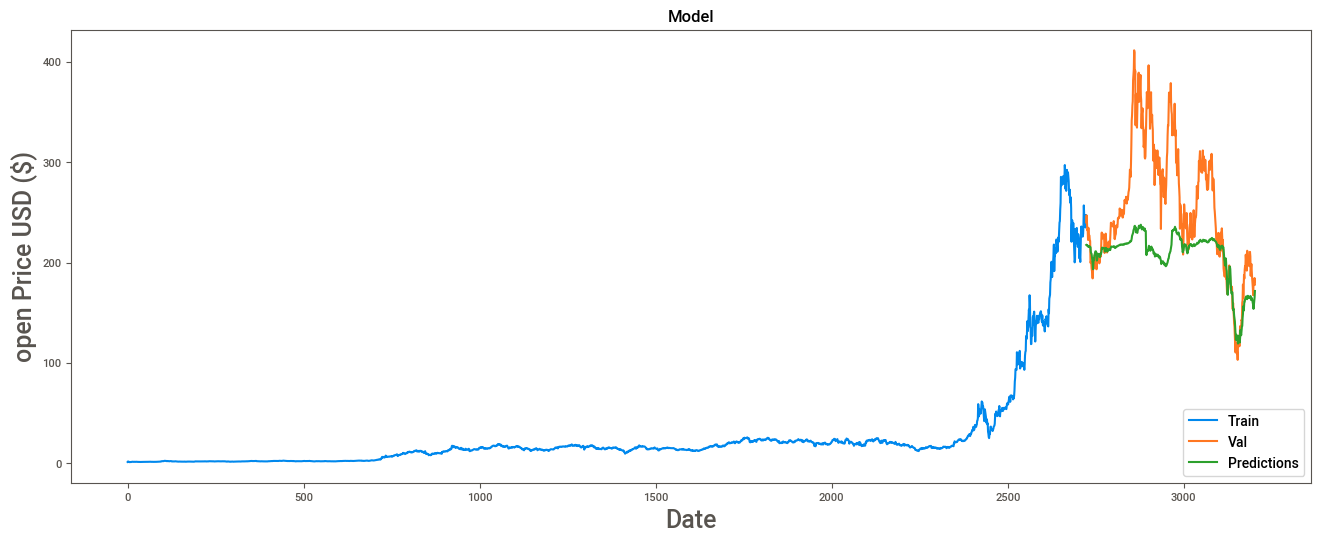

            open        high         low       close    adjclose     volume  \
2723  239.933334  245.786667  238.486664  243.133331  243.133331   85110000   
2724  247.000000  249.766663  244.203339  246.066666  246.066666   93115500   
2725  239.320007  241.333328  234.449997  234.913330  234.913330   88311000   
2726  232.136673  236.166672  231.199997  231.466660  231.466660   66813000   
2727  233.169998  234.083328  222.833328  225.666672  225.666672   86536200   
...          ...         ...         ...         ...         ...        ...   
3198  177.309998  183.800003  177.139999  183.259995  183.259995  143717900   
3199  180.800003  182.339996  176.029999  180.449997  180.449997  145995600   
3200  180.369995  185.809998  178.839996  184.130005  184.130005  121136800   
3201  184.520004  186.220001  177.330002  180.130005  180.130005  132936600   
3202  178.080002  186.440002  176.350006  183.250000  183.250000  129507600   

      Predictions  
2723   217.518219  
2724   217.

In [15]:
# MAKING A MODEL FOR OPEN

data=data_7.filter(['open'])
dataset=data.values



training_data_len=int(np.ceil(len(dataset)*.85 ))
train_data=dataset[0:int(training_data_len), :]



x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model_1 = Sequential()
model_1.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_1.add(LSTM(64, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

# Compile the model
model_1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_1.fit(x_train, y_train,batch_size=1,epochs=10)



test_data = dataset[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model_1.predict(x_test)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("test rmse : ",rmse)


import matplotlib.pyplot as plt
train=data_7[:training_data_len]
valid=data_7[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('open Price USD ($)', fontsize=18)
plt.plot(train['open'])
plt.plot(valid[['open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

print(valid)